In [1]:
import pandas as pd
import numpy as np

#### Linear Regression with Single variable

In [2]:
income_df = pd.read_csv(r'..\JNB_data\canada_per_capita_income.csv')

In [3]:
income_df.rename(columns={"per capita income (US$)": "per_capita_income"}, inplace=True)

In [4]:
income_df.head(2)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935


In [5]:
import matplotlib.pyplot as plt

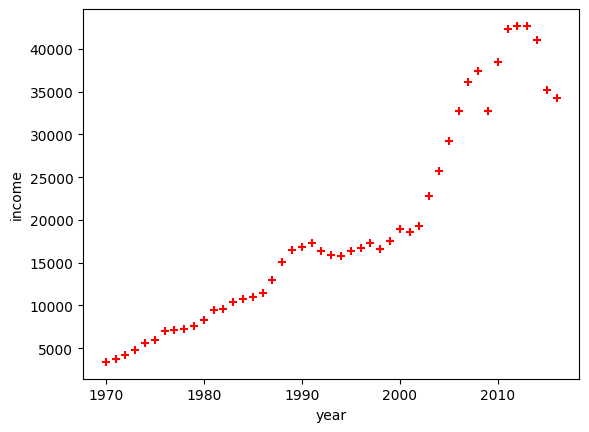

In [6]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(income_df.year, income_df.per_capita_income,color='red',marker='+')

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
model = linear_model.LinearRegression()

In [9]:
X_df = pd.DataFrame(income_df.year)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, income_df.per_capita_income, test_size=0.2)

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([779.22862721])

In [13]:
model.intercept_

-1534569.6052996467

In [14]:
model.predict([[2020]])

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39472.22166883])

In [15]:
model.score(X_test, y_test)

0.8744862197070008

#### Linear Regression with Multi variable

In [40]:
hiring_df = pd.read_csv(r'..\JNB_data\hiring.csv')

In [31]:
hiring_df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [32]:
hiring_df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [35]:
'''ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values'''

'ValueError: Input X contains NaN.\nLinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values'

In [7]:
#there are packages which can convert words to numbers which we can use it.

In [41]:
hiring_df.experience.unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [42]:
import numpy as np
hiring_df['years_of_expr'] = pd.Series([np.nan, np.nan,5,2,7,3,10,11])

In [43]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($),years_of_expr
0,NaN,8.0,9,50000,NaN
1,NaN,8.0,6,45000,NaN
2,five,6.0,7,60000,5.0
3,two,10.0,10,65000,2.0
4,seven,9.0,6,70000,7.0
5,three,7.0,10,62000,3.0
6,ten,NaN,7,72000,10.0
7,eleven,7.0,8,80000,11.0


In [44]:
hiring_df.years_of_expr

0     NaN
1     NaN
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: years_of_expr, dtype: float64

In [45]:
import math
hiring_df.years_of_expr.fillna(math.floor(hiring_df.years_of_expr.mean()), inplace=True)

In [46]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($),years_of_expr
0,NaN,8.0,9,50000,6.0
1,NaN,8.0,6,45000,6.0
2,five,6.0,7,60000,5.0
3,two,10.0,10,65000,2.0
4,seven,9.0,6,70000,7.0
5,three,7.0,10,62000,3.0
6,ten,NaN,7,72000,10.0
7,eleven,7.0,8,80000,11.0


In [47]:
import math
mean_test_score = math.floor(hiring_df['test_score(out of 10)'].mean())

In [48]:
hiring_df['test_score(out of 10)'] =  hiring_df['test_score(out of 10)'].fillna(mean_test_score)

In [49]:
hiring_salary = hiring_df['salary($)']

In [56]:
hiring_X = hiring_df.drop(['experience','salary($)'],axis=1)

In [57]:
hiring_X

,test_score(out of 10),interview_score(out of 10),years_of_expr
0,8.0,9,6.0
1,8.0,6,6.0
2,6.0,7,5.0
3,10.0,10,2.0
4,9.0,6,7.0
5,7.0,10,3.0
6,7.0,7,10.0
7,7.0,8,11.0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(hiring_X, hiring_salary, test_size = 0.2)

In [131]:
X_train

,test_score(out of 10),interview_score(out of 10),years_of_expr
2,6.0,7,5.0
1,8.0,6,6.0
3,10.0,10,2.0
7,7.0,8,11.0
0,8.0,9,6.0
6,7.0,7,10.0


In [132]:
X_test

,test_score(out of 10),interview_score(out of 10),years_of_expr
4,9.0,6,7.0
5,7.0,10,3.0


In [93]:
from sklearn import linear_model

In [94]:
multi_model = linear_model.LinearRegression()

In [133]:
multi_model.fit(X_train, y_train)

LinearRegression()

In [96]:
multi_model.feature_names_in_ 

array(['test_score(out of 10)', 'interview_score(out of 10)',
       'years_of_expr'], dtype=object)

In [103]:
multi_model.predict([[10,10, 12]])

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61398.98382137])

In [134]:
multi_model.score(X_test, y_test)

-12.011867516821958

In [ ]:
#score is poor

In [107]:
print(hiring_X)
hiring_salary

   test_score(out of 10)  interview_score(out of 10)  years_of_expr
0                    8.0                           9            6.0
1                    8.0                           6            6.0
2                    6.0                           7            5.0
3                   10.0                          10            2.0
4                    9.0                           6            7.0
5                    7.0                          10            3.0
6                    7.0                           7           10.0
7                    7.0                           8           11.0


0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [108]:
concat_df =  pd.concat([hiring_X, hiring_salary], axis=1)
concat_df

,test_score(out of 10),interview_score(out of 10),years_of_expr,salary($)
0,8.0,9,6.0,50000
1,8.0,6,6.0,45000
2,6.0,7,5.0,60000
3,10.0,10,2.0,65000
4,9.0,6,7.0,70000
5,7.0,10,3.0,62000
6,7.0,7,10.0,72000
7,7.0,8,11.0,80000


In [110]:
corelation_matrix = concat_df.corr()
corelation_matrix

,test_score(out of 10),interview_score(out of 10),years_of_expr,salary($)
test_score(out of 10),1.000000,0.186655,-0.376867,-0.077524
interview_score(out of 10),0.186655,1.000000,-0.525298,0.037820
years_of_expr,-0.376867,-0.525298,1.000000,0.503980
salary($),-0.077524,0.037820,0.503980,1.000000


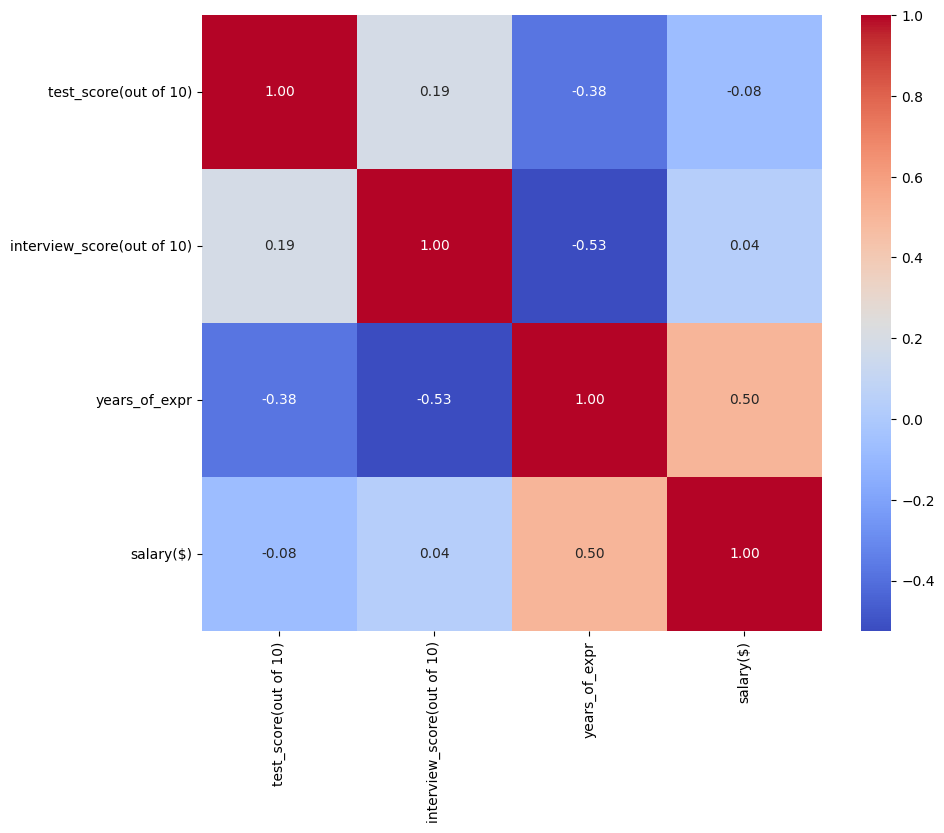

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [113]:
from sklearn.model_selection import cross_val_score

In [117]:
cross_val_score(multi_model, hiring_X, hiring_salary,cv=8)

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [120]:
cross_val_score(multi_model, hiring_X, hiring_salary,cv=5,scoring=None)

C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Python_Vignesh\jnb_venv\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([-60.94676994, -17.30358995, -12.01186752,          nan,
                nan])

In [121]:
multi_model_lasso = linear_model.Lasso()

In [122]:
multi_model_ridge = linear_model.Ridge()

In [135]:
multi_model_lasso.fit(X_train, y_train)

Lasso()

In [136]:
multi_model_ridge.fit(X_train, y_train)

Ridge()

In [137]:
multi_model_lasso.score(X_test, y_test)

-12.003584203348842

In [138]:
multi_model.score(X_test, y_test)

-12.011867516821958

In [139]:
multi_model_ridge.score(X_test, y_test)

-8.533770658166302

In [140]:
multi_model_ridge.coef_

array([-1226.69826224,  4740.91627172,  2702.21169036])

In [141]:
multi_model_lasso.coef_

array([-1960.20535716,  5668.23031804,  2742.94409769])

In [142]:
multi_model.coef_

array([-1962.13827037,  5669.919106  ,  2742.89050121])